<a href="https://colab.research.google.com/github/alineaprelini/Pyspark/blob/main/Spark_DML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pySpark

In [2]:
#Bibliotecas
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql import functions as F
from pyspark.sql.types import *
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Iniciando Sessão
spark = SparkSession.builder \
    .appName("A") \
    .getOrCreate()

In [4]:
#Carregando base de dados
df1 = spark.read.csv('Marca.csv', header = True, sep = ',')
df2 = spark.read.csv('Produto.csv', header = True, sep = ',')
df3 = spark.read.csv('Clientes.csv', header = True, sep = ';')

In [5]:
df1.show(10)
df2.show(10)
df3.show(10)

+---+-------------+-----------+-------+----------+------------------+--------------------+
|_c0|    IdProduto|DescProduto|IdMarca|Quantidade|             Preço|           DescMarca|
+---+-------------+-----------+-------+----------+------------------+--------------------+
|  0|1245741840860|     Social|      5|       788|             15.41| Li, Smith and Scott|
|  1|9214404086305|      Point|      7|       924|47.720000000000006|Gonzales, Young a...|
|  2|6223853590489|   Evidence|      2|       383|              37.6|        Martin Group|
|  3|8251950562038|        Too|      1|       666|15.739999999999998|Lawrence, William...|
|  4|0868436639740|    Quickly|      9|       242|             79.35|Ayala, Mitchell a...|
|  5|7679841035569|       Door|     10|       697|             76.04|           Black LLC|
|  6|3610164719044|         Tv|      3|       933| 97.91000000000001|         Hardy-Allen|
|  7|3786459022783|     Summer|      6|        15|             45.28|     Sheppard-Duncan|

In [6]:
#Join Marca = produto
df4 = df2.join(df1, df2['IdMarca'] == df1['IdMarca'], how='inner').select(df1['IdMarca'], df1['DescMarca'], df2['IdProduto'], df2['DescProduto'], df2['Quantidade'], df2['Preço'])
df4.show()


+-------+--------------------+-------------+-----------+----------+------------------+
|IdMarca|           DescMarca|    IdProduto|DescProduto|Quantidade|             Preço|
+-------+--------------------+-------------+-----------+----------+------------------+
|      5|           Kim-Smith|1245741840860|     Social|       788|             15.41|
|      5|       Phelps-Butler|1245741840860|     Social|       788|             15.41|
|      5|Edwards, Williams...|1245741840860|     Social|       788|             15.41|
|      5|          Duran-Pace|1245741840860|     Social|       788|             15.41|
|      5|        Payne-Mathis|1245741840860|     Social|       788|             15.41|
|      5|Aguilar, Medina a...|1245741840860|     Social|       788|             15.41|
|      5|          Little LLC|1245741840860|     Social|       788|             15.41|
|      5|      Harris-Cabrera|1245741840860|     Social|       788|             15.41|
|      5|           Hines Inc|1245741840860

In [7]:
df4.printSchema

<bound method DataFrame.printSchema of DataFrame[IdMarca: string, DescMarca: string, IdProduto: string, DescProduto: string, Quantidade: string, Preço: string]>

In [8]:
df5 = df4.join(df3, df3['IdMarca'] == df4['IdMarca']).select(df3['IdCliente'],df3['Nome'], df3['Idade'], df3['País'], df3['Cidade'], df3['IdProduto'], df3['IdMarca'], df4['DescProduto'],df3['Quantidade'], df4['Preço'])
df5.show()

+---------+-----------------+-----+--------------------+------------------+---------+-------+-----------+----------+-----+
|IdCliente|             Nome|Idade|                País|            Cidade|IdProduto|IdMarca|DescProduto|Quantidade|Preço|
+---------+-----------------+-----+--------------------+------------------+---------+-------+-----------+----------+-----+
| 80934224|   Abigail Holmes|   35|              Poland|        Debbiefurt|        5|      5|     Social|         8|15.41|
| 60936668| Richard Anderson|   19|             Reunion|      West Matthew|        1|      5|     Social|         6|15.41|
| 21205014|     Antonio West|   51|               Gabon|       Loriborough|       10|      5|     Social|         5|15.41|
| 92005975|  Michael Blevins|   33|           Mauritius|West Angelicamouth|        6|      5|     Social|         2|15.41|
| 97694562|      Sharon Boyd|   25|              Cyprus|    Lake Jasonberg|        6|      5|     Social|         7|15.41|
| 41374434|Mr. J

In [9]:
#Total de vendas por produto
p = df5.groupBy('DescProduto').agg(F.count('Quantidade').alias('QuantidadeTotal')).orderBy(F.desc('QuantidadeTotal'))


+-------------+---------------+
|  DescProduto|QuantidadeTotal|
+-------------+---------------+
|       Enough|          57913|
|       Center|          56592|
|        Point|          42537|
|        Green|          41755|
|         Rich|          38003|
|           Tv|          36249|
|Environmental|          35223|
|      Quickly|          28851|
|       Anyone|          28296|
|         Open|          28296|
+-------------+---------------+



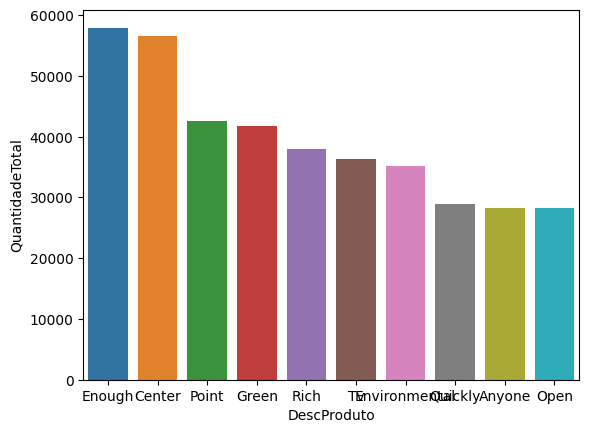

In [10]:

# Obter as 10 primeiras linhas
topVendas = p.limit(10)
topVendas.show()

# Converter o DataFrame em um Pandas DataFrame
topVendas_pd = topVendas.toPandas()

# Gerar o gráfico de barras usando o Seaborn
sns.barplot(x='DescProduto', y='QuantidadeTotal', data=topVendas_pd)

# Exibir o gráfico
plt.show()

+-------------+---------------+
|  DescProduto|QuantidadeTotal|
+-------------+---------------+
|       Enough|          57913|
|       Center|          56592|
|        Point|          42537|
|        Green|          41755|
|         Rich|          38003|
|           Tv|          36249|
|Environmental|          35223|
|      Quickly|          28851|
|       Anyone|          28296|
|         Open|          28296|
+-------------+---------------+



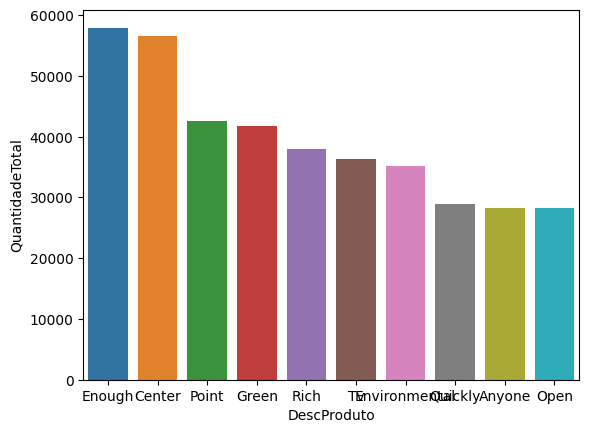

In [11]:
lowVendas = df5.groupBy('DescProduto').agg(F.count('Quantidade').alias('QuantidadeTotal')).orderBy(F.asc('QuantidadeTotal'))
LowVendas = p.limit(10)
LowVendas.show()

# Converter o DataFrame em um Pandas DataFrame
lowVendas_pd = LowVendas.toPandas()

# Gerar o gráfico de barras usando o Seaborn
sns.barplot(x='DescProduto', y='QuantidadeTotal', data=lowVendas_pd)

# Exibir o gráfico
plt.show()

In [12]:
df5 = df5.withColumn('Total_venda', F.round(F.col('Preço') * F.col('Quantidade')))
df5.show()


+---------+-----------------+-----+--------------------+------------------+---------+-------+-----------+----------+-----+-----------+
|IdCliente|             Nome|Idade|                País|            Cidade|IdProduto|IdMarca|DescProduto|Quantidade|Preço|Total_venda|
+---------+-----------------+-----+--------------------+------------------+---------+-------+-----------+----------+-----+-----------+
| 80934224|   Abigail Holmes|   35|              Poland|        Debbiefurt|        5|      5|     Social|         8|15.41|      123.0|
| 60936668| Richard Anderson|   19|             Reunion|      West Matthew|        1|      5|     Social|         6|15.41|       92.0|
| 21205014|     Antonio West|   51|               Gabon|       Loriborough|       10|      5|     Social|         5|15.41|       77.0|
| 92005975|  Michael Blevins|   33|           Mauritius|West Angelicamouth|        6|      5|     Social|         2|15.41|       31.0|
| 97694562|      Sharon Boyd|   25|              Cyprus

In [13]:
c = df5.groupBy('Nome').agg(F.sum('Total_venda').alias('Total_venda_Cliente'))
c.show()

+-------------------+-------------------+
|               Nome|Total_venda_Cliente|
+-------------------+-------------------+
|       Tommy Wilson|            86528.0|
|        Sharon Hale|            10832.0|
|      Tina Mccarthy|            21632.0|
|          John Dean|            86528.0|
|Robert Alvarado Jr.|            21812.0|
|         Mary Moore|           170448.0|
|        Tonya Walsh|           218481.0|
|     Raymond Cooper|           131142.0|
|         Rita Fritz|           131142.0|
|     Brent Harrison|           252288.0|
|      Melanie Lopez|            36045.0|
|      Adam Williams|            72063.0|
|       Anna Pittman|            73836.0|
|      Sheryl Grimes|            18480.0|
|      Nicole Stuart|            64582.0|
|     Connie Bentley|            83048.0|
|       Megan Butler|            18480.0|
|    Melanie Ramirez|            55370.0|
|   Laurie Hernandez|            64582.0|
|        Helen Jones|           283392.0|
+-------------------+-------------

In [17]:
# Registre o DataFrame como uma tabela temporária
df5.createOrReplaceTempView("Clientes")

# Execute uma consulta SQL no DataFrame
consulta_sql = "SELECT * FROM Clientes WHERE Idade >= 30"
resultado = spark.sql(consulta_sql)

# Visualize o resultado da consulta
resultado.show()

# Gere o script SQL correspondente à consulta
script_sql = resultado.explain()


+---------+-----------------+-----+--------------------+------------------+---------+-------+-----------+----------+-----+-----------+
|IdCliente|             Nome|Idade|                País|            Cidade|IdProduto|IdMarca|DescProduto|Quantidade|Preço|Total_venda|
+---------+-----------------+-----+--------------------+------------------+---------+-------+-----------+----------+-----+-----------+
| 80934224|   Abigail Holmes|   35|              Poland|        Debbiefurt|        5|      5|     Social|         8|15.41|      123.0|
| 21205014|     Antonio West|   51|               Gabon|       Loriborough|       10|      5|     Social|         5|15.41|       77.0|
| 92005975|  Michael Blevins|   33|           Mauritius|West Angelicamouth|        6|      5|     Social|         2|15.41|       31.0|
| 41374434|Mr. Jonathan Kemp|   48|      American Samoa|        Teresabury|        7|      5|     Social|        10|15.41|      154.0|
| 38710902|     Allison Bell|   55|              Kuwait

In [ ]:
df5.write.format("csv").mode("overwrite").save("T.csv")